In [1]:
#loading libraries
library(psych)
library(reshape)
library(dplyr)
library(RColorBrewer)
library(gridExtra)
library(ggplot2)
#source("https://raw.githubusercontent.com/eogasawara/mylibrary/master/myGraphic.R")
#source("https://raw.githubusercontent.com/eogasawara/mylibrary/master/myClustering.R")
#source("https://raw.githubusercontent.com/eogasawara/mylibrary/master/myBasic.R")
source("https://raw.githubusercontent.com/cefet-rj-dal/dal/main/R/clu_kmeans.R")
source("https://raw.githubusercontent.com/cefet-rj-dal/dal/main/R/clu_main.R")
source("https://raw.githubusercontent.com/cefet-rj-dal/dal/main/R/dal_main.R")
source("../funcoes_analise_ch.R")

#loading data
dados <-read.csv("event_export_2022-07-20.csv", header = TRUE, sep = ";")
head(dados)
nrow(dados)
ncol(dados)

Warning message:
"package 'reshape' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following object is masked from 'package:reshape':

    rename

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'gridExtra' was built under R version 3.6.3"
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine


Attaching package: 'ggplot2'

The following objects are masked from 'package:psych':

    %+%, alpha



id,session,type,agent,time,attr1,attr2,attr3
21898,194,plantar,grama,3,252,225,325
21899,194,plantar,grama,5,254,275,327
21900,194,plantar,grama,7,256,325,326
21901,194,desenvolvimento,grama,10,257,225,325
21902,194,plantar,grama,9,258,375,326
21903,194,desenvolvimento,grama,12,259,275,327


[1] 484688

[1] 8

In [2]:
#List of players
players <- read.csv("player_export_2022-07-20.csv", header = TRUE, sep = ";")
head(players)
nrow(players)
ncol(players)

#Avaliation Join Tables
aval_turma_bio <- read.csv("join_tabelas_aval-2022-07-20.csv", header = TRUE, sep = ";")
head(aval_turma_bio)
nrow(aval_turma_bio)
ncol(aval_turma_bio)

#Avaliation Join Tables
aval_turma_info <- read.csv("join_tabelas_aval-2022-06-09.csv", header = TRUE, sep = ";")
head(aval_turma_info)
nrow(aval_turma_info)
ncol(aval_turma_info)

aval_turma_info_eait <-read.csv2("dadosGrupos.csv", header = TRUE, sep = ";")
head(aval_turma_info_eait)
nrow(aval_turma_info_eait)
ncol(aval_turma_info_eait)

id,name,score,day,month,year,hour,minute,device,expcode
6,teste,255,16,7,2021,20,1,5,
7,teste,90,16,7,2021,20,3,5,
8,,400,22,7,2021,18,28,454,
9,test,765,22,7,2021,18,59,9,
10,Bob,400,6,8,2021,12,10,10,
11,Nicholas,0,11,8,2021,22,7,11,


[1] 539

[1] 10

email,name,key,grp,q1,q2,q3,q4,q5,q6,...,q39,q40,q41,q42,q43,q44,q45,q46,q47,q48
alexiavital57@gmail.com,Alexia da Silva Vital,95609edc,4,18,Eletrônica,4AELT,Escola Municipal João XXIII,0,10,...,1,2,4,2,4,1,1,2,1,"Bom, ele pode fazer a rotação de culturas sim, porém quando o arroz for plantado novamente muito provavelmente a praga dos gafanhotos voltará. Ele pode fazer um controle biológico com uma espécie predadora de gafanhotos na plantação de arroz assim não perdendo a plantação e nem fazendo o uso de agrotóxicos."
arthurkikuts@hotmail.com,Athur Fontes Rebelo Kikuts,1c8481c5,3,18,Eletrotécnica,4AEL,Colégio Curso Desafio,4,22,...,4,5,4,4,4,2,2,2,1,"Responderia para ele fazer nenhuma das opções e optar por investir em medidas de controle biológico, já que ampliando a plantação de arroz ou diversificando os cultivos pode servir como fator de ampliação da espécie de gafanhotos."
brenoej@gmail.com,Breno Junqueira,2c313a49,1,19,Eletrotécnica,4AEL,Colégio Palas,14,21,...,7,1,2,1,5,2,1,2,1,"Plantio alternado, variando a produção"
caiiocbarcelos@gmail.com,Caio Cunha Barcelos,a7a3a7ce,4,20,Eletrotécnica,4AEL,Escola Municipal Gil Vicente,20,10,...,7,1,3,1,3,2,1,2,1,"Alternar a plantação, assim diminuindo a incidência de gafanhotos e a perda da plantação, porém com atenção à outras espécies invasoras ao redor do novo plantio"
caion.oliveira9@gmail.com,Caio da Silva Nonato Oliveira,6d519978,1,18,Eletrotécnica,4AELINT,CEFET-RJ/Campus Maracanã,0,6,...,6,2,4,4,4,2,1,1,1,"Uma observação seria analisar corretamente a região, no auxílio de profissionais legalizados, pois conseguiria conservar o território para o determinado cultivo, mesmo que seja possível a presença de um novo cultivo."
carlosifsm@gmail.com,Carlos Ichiro Falcão de Souza Matsushita,95350bff,2,18,Eletrônica,4AELT,pH,5,15,...,2,1,4,3,4,2,1,2,1,outros cultivos


[1] 29

[1] 64

email,name,key,grp,q1,q2,q3,q4,q5,q6,...,q39,q40,q41,q42,q43,q44,q45,q46,q47,q48
kakarotokiiilll0099@gmail.com,Matheus Santos Paulino,0098a532,4,15,informática,1AINFO,CENTRO EDUCACIONAL CALIFORNIA,30,1,...,5,3,3,2,4,2,2,2,1,para você matar os gafanhotos utilize insetos que os gafanhotos são as presa deles e que a plantação são sege o alimentos dela
Jvaobito@gmail.com.br,João Vitor Antunes Pereira,014644f4,2,15,Informatica,1Ainfo/ Manha,"Prudente de Moraes, Orsina da Fonseca, Cefet",6,10,...,7,1,4,1,2,1,1,1,2,pensaria em expandi ou dividir o terreno para que a diversidade de produtos fosse maior
silvabreno966@gmail.com,Breno da Silva Assunção,053f01f8,3,15,informática,1binfo,cefet,5,2,...,7,5,2,5,6,1,1,1,1,"não, ia gastar arroz atoa"
raissadsa21@gmail.com,raissa de souza araujo,09705fc7,1,17,infotmática,1AINFO,Escola Municipal Governador Carlos Lacerda,7,10,...,7,1,3,1,1,1,2,1,1,para utilizar uma parte da área para plantar outros cultivos
p2droliveira@gmail.com,Pedro dos Santos de Oliveira,0a3e917c,3,16,Informática,1BINFO,Colégio curso ZeroHum,0,10,...,2,4,5,4,4,2,1,1,2,Acho que investir em outros cultivos seria mais eficiente.
joaolarrate@gmail.com,João Vitor Larrate Fontes,0b594314,4,15,informatica,1AINFO,Pensi,16,14,...,6,2,3,2,4,2,2,2,2,alternar os plantios


[1] 49

[1] 64

ï..ID,GRUPO,PTOS.Q10,PTOS.Q11
36ab54bb,1,0.75,1.0
374fbdfd,1,0.50,1.0
ee2847f2,1,0.50,1.0
f6f94693,1,0.75,0.5
da59884f,1,0.75,0.5
2fdd5d48,1,0.75,0.5


[1] 48

[1] 4

In [3]:
grp3_joel<-aval_turma_info %>% filter(grp==3)
#grp3_joel
nrow(grp3_joel)

##### filtrando turma do joel #####
set.seed(123)
grp3_joel<-sample_n(grp3_joel, 7)

aval_turma_info <- rbind(grp3_joel %>% select (key,grp),aval_turma_info %>% filter(grp==1|grp==2|grp==4) %>% select (key,grp))
nrow(aval_turma_info)


[1] 21

[1] 28

In [4]:
aval_participantes <- rbind(aval_turma_bio %>% select (key,grp),aval_turma_info %>% select (key,grp))
colnames(aval_turma_info_eait)[c(1,2)] <- c("key","grp")
aval_participantes <- rbind(aval_participantes,aval_turma_info_eait %>% select (key,grp))
#aval_participantes
aval_participantes %>% select (grp) %>% group_by(grp) %>% summarise(n = n())
#aval_participantes <- aval_participantes %>% filter(grp!=0)
#aval_participantes %>% select (grp) %>% group_by(grp) %>% summarise(n = n())



grp,n
1,26
2,26
3,28
4,25


In [5]:

#### equilibrando os grupos
grp1<-aval_participantes %>% filter(grp==1)
grp2<-aval_participantes %>% filter(grp==2)
grp3<-aval_participantes %>% filter(grp==3)
grp4<-aval_participantes %>% filter(grp==4)

set.seed(123)
grp1<-sample_n(grp1, 25)
grp2<-sample_n(grp2, 25)
grp3<-sample_n(grp3, 25)
grp4<-sample_n(grp4, 25)

aval_participantes <- rbind(grp1,grp2)
aval_participantes <- rbind(aval_participantes,grp3)
aval_participantes <- rbind(aval_participantes,grp4)
aval_participantes
aval_participantes %>% select (grp) %>% group_by(grp) %>% summarise(n = n())
nrow(aval_participantes)

key,grp
36ab54bb,1
da59884f,1
916a23c3,1
facb93c1,1
284eaf3c,1
f6f94693,1
56127746,1
57ded246,1
c3619fad,1
0d54cbbc,1


grp,n
1,25
2,25
3,25
4,25


[1] 100

In [6]:

aval_sessions_2022 <- players %>% filter (expcode %in% aval_participantes$key)
head(aval_sessions_2022)
nrow(aval_sessions_2022)
ncol(aval_sessions_2022)

###Only sessions above 5 minutes and sessions 5 minutes less with game over####
aval_sessions_2021 <- c(211,212,239,241,240,260,261,259,262,264,271,272,273,274,275,300,303,305,306,307,308,309,328,330,331,332,333,335,336,338,339,340,337,341,344,345,350,351,352,356,357,374,381,383,384,385,402,403,407,414,416,429)


id,name,score,day,month,year,hour,minute,device,expcode
467,c6e166e0,1290,20,5,2022,17,9,467,c6e166e0
469,c48dbfd3,50,20,5,2022,17,15,469,c48dbfd3
472,c48dbfd3,85,20,5,2022,17,16,469,c48dbfd3
474,c48dbfd3,90,20,5,2022,17,18,469,c48dbfd3
475,c48dbfd3,85,20,5,2022,17,19,469,c48dbfd3
492,Pedro dos Santos,400,20,5,2022,17,31,492,0a3e917c


[1] 106

[1] 10

In [7]:
#todas_sessoes <- c(aval_sessions_turma_bio$id,aval_sessions_turma_info$id,aval_sessions_turma_info_eait)
todas_sessoes <- c(aval_sessions_2022$id,aval_sessions_2021)
todas_sessoes <- sort(todas_sessoes)
todas_sessoes

[1] 211 212 239 240 241 259 260 261 262 264 271 272 273 274 275 300 303 305
 [19] 306 307 308 309 328 330 331 332 333 335 336 337 338 339 340 341 344 345
 [37] 350 351 352 356 357 374 381 383 384 385 402 403 407 414 416 429 467 469
 [55] 472 474 475 492 497 501 503 507 508 514 516 518 526 527 528 529 532 534
 [73] 537 538 541 542 543 544 545 546 547 548 549 550 551 552 553 554 555 556
 [91] 558 559 561 563 564 565 566 567 568 569 570 571 572 573 576 577 578 579
[109] 580 581 582 583 584 585 586 588 590 591 592 593 594 595 596 597 598 600
[127] 602 603 604 605 606 607 608 609 610 611 612 614 615 616 617 618 622 623
[145] 626 627 628 629 630 631 632 633 634 635 637 639 640 641

In [8]:
############### última sessão de cada jogador ############
#aval_sessions_2022 %>% select (expcode,id)
ultimas_sessoes_2022 <- aval_sessions_2022 %>% select (expcode,id) %>% group_by(expcode) %>% summarise(session = max(id))
nrow(ultimas_sessoes_2022)
ultimas_sessoes_2022

aval_session_info_eait <-read.csv2("session_data.csv", header = TRUE, sep = ";")
colnames(aval_session_info_eait)[c(1,3,5)]<-c("expcode","id","score")
#aval_session_info_eait
#nrow(aval_session_info_eait)
ultimas_sessoes_2021 <- aval_session_info_eait %>% select (expcode,id) %>% group_by(expcode) %>% summarise(session = max(id))
#ultimas_sessoes_2021
nrow(ultimas_sessoes_2021)
ultimas_sessoes_2021


ultimas_sessoes<-rbind(ultimas_sessoes_2022,ultimas_sessoes_2021)
#ultimas_sessoes
nrow(ultimas_sessoes)
ultimas_sessoes<-ultimas_sessoes$session
ultimas_sessoes

[1] 54

expcode,session
0098a532,567
09705fc7,541
0a3e917c,503
0b594314,559
0f862da6,558
11034587,518
1c8481c5,593
284eaf3c,556
2c313a49,596
2f53b5d0,553


[1] 22

expcode,session
03bc2477,381
09705fc7,309
0cc788e2,337
14eaca5b,260
1f15b27b,357
218de613,336
2defa047,332
3342ed9e,212
345e3fd3,262
394b1345,330


[1] 76

[1] 567 541 503 559 558 518 593 556 596 553 576 547 630 543 542 629 508 606 626
[20] 602 604 573 627 618 628 565 635 568 631 612 561 600 527 537 622 538 641 475
[39] 633 467 578 579 605 640 595 514 614 529 603 569 563 597 616 564 381 309 337
[58] 260 357 336 332 212 262 330 275 345 429 264 403 272 241 385 305 352 375 414

In [9]:
dados$id <- NULL #removing the id column

#summary(dados)

#Turning categorical attributes into factors
cols = c("type", "agent")
fac.dados = dados
fac.dados[cols] = lapply(dados[cols], factor)

#Filtering events of actual avaliation sessions
#fac.dados <- fac.dados %>% filter (session %in% todas_sessoes)
fac.dados <- fac.dados %>% filter (session %in% ultimas_sessoes)


#plants
pop.plant = fac.dados[c(1,2,3,4)] %>% filter((type=="meta cumprida")|((type=="plantar"|type=="Predacao"|type=="colher") & (agent=="tomate"|agent=="tomate em desenvolvimento"|agent=="milho"|agent=="milho em desenvolvimento"|agent=="couve"|agent=="couve em desenvolvimento"|agent=="grama"|agent=="grama em desenvolvimento")))
pop.plant = pop.plant[order(pop.plant$session, pop.plant$time),]

#pests  
pop.plague = fac.dados[c(1,2,3,4)] %>% filter((type=="meta cumprida")|((type=="morte"|type=="Predacao"|type=="Novo inseto") & (agent=="grilo"|agent=="lagarta"|agent=="pulgao"|agent=="cigarrinha")))
pop.plague = pop.plague[order(pop.plague$session, pop.plague$time),]

#predators
pop.predator = fac.dados[c(1,2,3,4)] %>% filter((type=="meta cumprida")|((type=="morte"|type=="Novo inseto"|type=="remover predador") & (agent=="besouro"|agent=="joaninha")))
pop.predator = pop.predator[order(pop.predator$session, pop.predator$time),]

gap = 10


input <- fac.dados %>% filter(type=="meta cumprida") %>% group_by(session,type)
input = input[order(input$session, input$time),]
max_meta_time = 0
actual_session = 0
for(i in 1:nrow(input)){
    session <- input[i,]$session
    if(session != actual_session){
      actual_session <- session
      total_meta = 0
    }
    total_meta = total_meta + 1
    if(total_meta == 8){
        max_meta_time = max(input[i,]$time,max_meta_time)
    }
}
max_meta_time

[1] 870

In [10]:
#creating plant population series
num_col = floor(max(pop.plant$time)/gap) + 1
series.pop.plant <- create_dataframe(num_col, gap)
actual_session = 0
line = 0
total_plant = 0
for(i in 1:length(pop.plant$session)){
  session <- pop.plant[i,]$session
  if(session != actual_session){
    line = line + 1
    actual_session <- session
    total_plant = 0
    series.pop.plant[line, 1] <- actual_session
  }
  if(pop.plant[i,]$type == "plantar"){
    total_plant = total_plant + 1
  }
  if(pop.plant[i,]$type == "Predacao" || pop.plant[i,]$type == "colher"){
    total_plant = total_plant - 1
  }
  col = floor(pop.plant[i,]$time/gap)+2
  if(total_plant < 0) total_plant = 0
  series.pop.plant[line, col] <- total_plant
}
series.pop.plant <- fill_na(series.pop.plant, nrow(series.pop.plant), pop.plant)
#series.pop.plant

#creating pest population series
num_col = floor(max(pop.plague$time)/gap) + 1
series.pop.plague <- create_dataframe(num_col, gap)
actual_session = 0
line = 0
total_plague = 0
for(i in 1:length(pop.plague$session)){
  session <- pop.plague[i,]$session
  if(session != actual_session){
    line = line + 1
    actual_session <- session
    total_plague = 0
    series.pop.plague[line, 1] <- actual_session
  }
  if(pop.plague[i,]$type == "Novo inseto"){
    total_plague = total_plague + 1
  }
  if(pop.plague[i,]$type == "Predacao" || pop.plague[i,]$type == "morte"){
    total_plague = total_plague - 1
  }
  col = floor(pop.plague[i,]$time/gap)+2
  if(total_plague < 0) total_plague = 0
  series.pop.plague[line, col] <- total_plague
}
series.pop.plague <- fill_na(series.pop.plague, nrow(series.pop.plague), pop.plague)

#creating predator population series
num_col = floor(max(pop.predator$time)/gap) + 1
series.pop.predator <- create_dataframe(num_col, gap)
actual_session = 0
line = 0
total_predator = 0
for(i in 1:length(pop.predator$session)){
  session <- pop.predator[i,]$session
  if(session != actual_session){
    line = line + 1
    actual_session <- session
    total_predator = 0
    series.pop.predator[line, 1] <- actual_session
  }
  if(pop.predator[i,]$type == "Novo inseto"){
    total_predator = total_predator + 1
  }
  if(pop.predator[i,]$type == "morte" || pop.predator[i,]$type == "remover predador"){
    total_predator = total_predator - 1
  }
  col = floor(pop.predator[i,]$time/gap)+2
  if(total_predator < 0) total_predator = 0
  series.pop.predator[line, col] <- total_predator
}
series.pop.predator <- fill_na(series.pop.predator, nrow(series.pop.predator), pop.predator)


var,n
1,29
2,10
3,22
4,14


TableGrob (3 x 1) "arrange": 3 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (2-2,1-1) arrange gtable[layout]
3 3 (3-3,1-1) arrange gtable[layout]

session,k
212,2
241,1
260,1
262,3
264,3
272,4
275,1
305,4
309,2
330,2


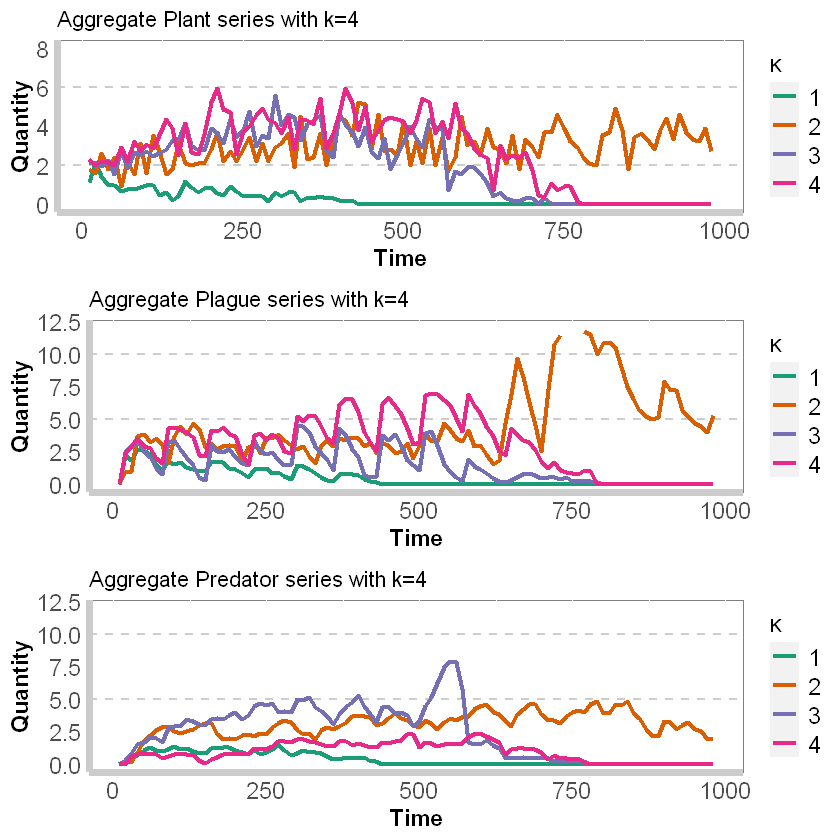

In [11]:
###############################
### Realizando a clusterizaçao
###############################

#data_serie <- return_cluster_comb(series.pop.plant, series.pop.plague, series.pop.predator, todas_sessoes, 4, 99)
data_serie <- return_cluster_comb(series.pop.plant, series.pop.plague, series.pop.predator, ultimas_sessoes, 4, 99)

###Winsorizing the series to remove outliers 2%
wseries.pop.plant <- series.pop.plant
wseries.pop.plant[,2:length(wseries.pop.plant)] <- psych::winsor(wseries.pop.plant[,2:length(wseries.pop.plant)], trim = 0.02)

wseries.pop.plague <- series.pop.plague
wseries.pop.plague[,2:length(wseries.pop.plague)] <- psych::winsor(wseries.pop.plague[,2:length(wseries.pop.plague)], trim = 0.02)

wseries.pop.predator <- series.pop.predator
wseries.pop.predator[,2:length(wseries.pop.predator)] <- psych::winsor(wseries.pop.predator[,2:length(wseries.pop.predator)], trim = 0.02)

#####APPLYING Z-SCORE
zscore_plant = wseries.pop.plant
zscore_plant[,2:length(zscore_plant)] = scale(zscore_plant[,2:length(zscore_plant)])
zscore_plant[is.na(zscore_plant)] <- 0

zscore_plague = wseries.pop.plague
zscore_plague[,2:length(zscore_plague)] = scale(zscore_plague[,2:length(zscore_plague)])
zscore_plague[is.na(zscore_plague)] <- 0

zscore_predator = wseries.pop.predator
zscore_predator[,2:length(zscore_predator)] = scale(zscore_predator[,2:length(zscore_predator)])
zscore_predator[is.na(zscore_predator)] <- 0


set.seed(222)

#####CLUSTERING WITH K=4
#zdata_serie <- return_cluster_comb(zscore_plant, zscore_plague, zscore_predator, todas_sessoes, 4, 99)
zdata_serie <- return_cluster_comb(zscore_plant, zscore_plague, zscore_predator, ultimas_sessoes, 4, 99)
count(zdata_serie, var = k)
data_serie$k <- zdata_serie$k
line_cluster_sep(data_serie, 10, 99, "Aggregate Plant series with k=4", "Aggregate Plague series with k=4", "Aggregate Predator series with k=4",0,8,0,12,0,12)
data_serie %>% select(session, k)

k4_classification <- zdata_serie$k


In [12]:
#aval_session_info_eait <-read.csv2("session_data.csv", header = TRUE, sep = ";")
#colnames(aval_session_info_eait)[c(1,3,5)]<-c("expcode","id","score")
#nrow(aval_session_info_eait)
#nrow(aval_sessions_2022)
aval_sessions<-rbind(aval_sessions_2022 %>% select (id,score,expcode),aval_session_info_eait %>% select (id,score,expcode))
aval_sessions <- aval_sessions %>% filter(id %in% ultimas_sessoes)
nrow(aval_sessions)


[1] 76

In [13]:
### Gerando dataset das estatisticas de jogo

#filtrando eventos dentro das 8 metas e contabilizando
eventos <- fac.dados[c(1,2,3,4)] %>% filter(time < max_meta_time)
event.quantity.data <- eventos %>% group_by(session,type) %>% summarise(n = n())
time_by_session <- fac.dados %>% select(session,time) %>% group_by(session) %>% summarise(across(everything(), list(max)))

#geranto dataset com sessoes classificadas e pontuacoes
x<-data_serie %>% select(session, k)
y<-aval_sessions %>% select(id, score)
game.data <- merge(x,y,by.x="session",by.y="id")

# adicionando coluna tempo
game.data <- merge(game.data,time_by_session,by.x="session",by.y="session")
max_meta_time
#game.data[game.data$time_1 > max_meta_time,]$time_1 <- max_meta_time
colnames(game.data)[ncol(game.data)] <- "time"

#adicionando predadores inseridos
pred <- event.quantity.data %>% filter(type=="inserir predador")
pred <- pred %>% select(session, n)
game.data <- merge(game.data, pred, by.x="session", by.y="session", all.x=TRUE) 
game.data[is.na(game.data)] <- 0
colnames(game.data)[ncol(game.data)] <- "Predadores"

#adicionando metas lançadas
pred <- event.quantity.data %>% filter(type=="meta lancada")
pred <- pred %>% select(session, n)
game.data <- merge(game.data, pred, by.x="session", by.y="session", all.x=TRUE) 
game.data[is.na(game.data)] <- 0
colnames(game.data)[ncol(game.data)] <- "Meta_lancada"

#adicionando metas cumpridas
pred <- event.quantity.data %>% filter(type=="meta cumprida")
pred <- pred %>% select(session, n)
game.data <- merge(game.data, pred, by.x="session", by.y="session", all.x=TRUE) 
game.data[is.na(game.data)] <- 0
#game.data[game.data$n > 8,]$n <- 8
colnames(game.data)[ncol(game.data)] <- "Meta_cumprida"

#adicionando Pontuacao / tempo
game.data$pontXtempo <- game.data$score / game.data$time

#adicionando plantas plantadas
pred <- event.quantity.data %>% filter(type=="plantar")
pred <- pred %>% select(session, n)
game.data <- merge(game.data, pred, by.x="session", by.y="session", all.x=TRUE) 
game.data[is.na(game.data)] <- 0
colnames(game.data)[ncol(game.data)] <- "Plantacoes"

#adicionando Plantas colhidas
pred <- event.quantity.data %>% filter(type=="colher")
pred <- pred %>% select(session, n)
game.data <- merge(game.data, pred, by.x="session", by.y="session", all.x=TRUE) 
game.data[is.na(game.data)] <- 0
colnames(game.data)[ncol(game.data)] <- "Colhidas"

#adicionando % planta colhida
game.data$percentColhida <- game.data$Colhidas / game.data$Plantacoes

#adicionando % meta cumprida
game.data$percentMetaCumprida <- game.data$Meta_cumprida / game.data$Meta_lancada

game.data[is.na(game.data)] <- 0
game.data
nrow(game.data)

`summarise()` has grouped output by 'session'. You can override using the `.groups` argument.


[1] 870

session,k,score,time,Predadores,Meta_lancada,Meta_cumprida,pontXtempo,Plantacoes,Colhidas,percentColhida,percentMetaCumprida
212,2,11385,1709,36,5,2,6.661790521,198,158,0.7979798,0.4000000
241,1,2430,429,18,2,1,5.664335664,56,51,0.9107143,0.5000000
260,1,195,406,18,2,2,0.480295567,33,30,0.9090909,1.0000000
262,3,140,396,22,3,1,0.353535354,68,52,0.7647059,0.3333333
264,3,40,563,93,5,3,0.071047957,181,156,0.8618785,0.6000000
272,4,190,773,4,4,1,0.245795602,177,99,0.5593220,0.2500000
275,1,120,98,4,1,0,1.224489796,18,11,0.6111111,0.0000000
305,4,155,606,28,4,3,0.255775578,203,129,0.6354680,0.7500000
309,2,30555,1061,14,5,4,28.798303487,280,246,0.8785714,0.8000000
330,2,43250,2156,32,5,3,20.060296846,278,255,0.9172662,0.6000000


[1] 75

In [14]:
#analisando dados de jogo por agrupamento
game.data %>% select(k, score, time, Predadores, Meta_lancada, Meta_cumprida, pontXtempo, Plantacoes, Colhidas, percentColhida, percentMetaCumprida) %>% group_by(k) %>% summarise(across(everything(), list(mean = mean, sd = sd), .names = "{.fn}.{.col}"))

game.data %>% select(k, score, time, Predadores, Meta_lancada, Meta_cumprida, pontXtempo, Plantacoes, Colhidas, percentColhida, percentMetaCumprida) %>% group_by(k) %>% summarise(across(everything(), list(mean = mean), .names = "{.fn}.{.col}"))

k,mean.score,sd.score,mean.time,sd.time,mean.Predadores,sd.Predadores,mean.Meta_lancada,sd.Meta_lancada,mean.Meta_cumprida,...,mean.pontXtempo,sd.pontXtempo,mean.Plantacoes,sd.Plantacoes,mean.Colhidas,sd.Colhidas,mean.percentColhida,sd.percentColhida,mean.percentMetaCumprida,sd.percentMetaCumprida
1,793.9655,1078.027,191.2069,152.0630,6.827586,7.833394,2.413793,1.936810,1.551724,...,5.689282,6.782707,23.72414,23.14380,18.2069,18.43401,0.6195412,0.30135638,0.4362069,0.4292405
2,10685.5000,14695.570,1223.8000,416.9934,32.400000,10.167486,7.100000,2.960856,4.900000,...,7.846496,9.611806,186.70000,67.51798,157.2000,61.60772,0.8393463,0.07014263,0.6712121,0.1730386
3,7422.2727,6668.738,573.8636,113.2567,33.318182,15.971362,7.681818,1.985336,6.636364,...,12.353377,10.904154,139.86364,55.30461,118.8636,51.29308,0.8426658,0.09251911,0.8490473,0.2210057
4,11059.2857,10320.323,671.8571,60.5778,13.928571,11.538993,8.357143,2.468483,6.714286,...,16.512286,15.273740,180.57143,61.13505,142.5714,65.31782,0.7689434,0.11512525,0.7702020,0.1879982


k,mean.score,mean.time,mean.Predadores,mean.Meta_lancada,mean.Meta_cumprida,mean.pontXtempo,mean.Plantacoes,mean.Colhidas,mean.percentColhida,mean.percentMetaCumprida
1,793.9655,191.2069,6.827586,2.413793,1.551724,5.689282,23.72414,18.2069,0.6195412,0.4362069
2,10685.5000,1223.8000,32.400000,7.100000,4.900000,7.846496,186.70000,157.2000,0.8393463,0.6712121
3,7422.2727,573.8636,33.318182,7.681818,6.636364,12.353377,139.86364,118.8636,0.8426658,0.8490473
4,11059.2857,671.8571,13.928571,8.357143,6.714286,16.512286,180.57143,142.5714,0.7689434,0.7702020


In [15]:
#### Series classificadas

data_serie$k <- k4_classification
x<-data_serie %>% select(session, k)
y<-aval_sessions %>% select(id, expcode)
classified_sessions <- merge(x,y,by.x="session",by.y="id")
classified_sessions
nrow(classified_sessions)

session,k,expcode
212,2,3342ed9e
241,1,8470df53
260,1,14eaca5b
262,3,345e3fd3
264,3,5d95d45a
272,4,75102763
275,1,42db7020
305,4,bd6ea82c
309,2,09705fc7
330,2,394b1345


[1] 75

In [16]:
######################
### Questoes 10 e 11
######################

#aval_session_info_eait
desempenho_teorico_2022 <- read.csv("avaliacao_teorica_turma_joel_myrna_leo.csv", header = TRUE, sep = ";")
desempenho_teorico_2022[is.na(desempenho_teorico_2022)] <- 0
desempenho_teorico_2022 <- desempenho_teorico_2022 %>% filter(grp==1|grp==2|grp==3|grp==4)
desempenho_teorico_2022 <- desempenho_teorico_2022 %>% filter(id %in% aval_participantes$key)
nrow(desempenho_teorico_2022)
#desempenho_teorico_2022

desempenho_teorico_e_jogo_2022 <- merge(desempenho_teorico_2022,classified_sessions,by.x="id",by.y="expcode")
desempenho_teorico_e_jogo_2022 <- desempenho_teorico_e_jogo_2022 %>% filter(session %in% aval_sessions$id)
nrow(desempenho_teorico_e_jogo_2022)
#desempenho_teorico_e_jogo_2022


desempenho_teorico_2021 <- as.data.frame(aval_turma_info_eait)
desempenho_teorico_2021[is.na(desempenho_teorico_2021)] <- 0
desempenho_teorico_2021 <- desempenho_teorico_2021 %>% filter(grp==1|grp==2|grp==3|grp==4)
desempenho_teorico_2021 <- desempenho_teorico_2021 %>% filter(key %in% aval_participantes$key)
nrow(desempenho_teorico_2021)
colnames(desempenho_teorico_2021)[c(3,4)]<-c("form_teoria_especies_p_manejo","form_teoria_cbXagrotóxicos")
#desempenho_teorico_2021

desempenho_teorico_e_jogo_2021 <- merge(desempenho_teorico_2021,classified_sessions,by.x="key",by.y="expcode")
desempenho_teorico_e_jogo_2021 <- desempenho_teorico_e_jogo_2021 %>% filter(session %in% aval_sessions$id)
nrow(desempenho_teorico_e_jogo_2021)
#desempenho_teorico_e_jogo_2021


desempenho_teorico_aval <- rbind(desempenho_teorico_2022 %>% select (grp,form_teoria_especies_p_manejo,form_teoria_cbXagrotóxicos),desempenho_teorico_2021 %>% select (grp,form_teoria_especies_p_manejo,form_teoria_cbXagrotóxicos))
nrow(desempenho_teorico_aval)
#desempenho_teorico_aval

desempenho_teorico_e_jogo_aval <- rbind(desempenho_teorico_e_jogo_2022 %>% select (grp,k,form_teoria_especies_p_manejo,form_teoria_cbXagrotóxicos),desempenho_teorico_e_jogo_2021 %>% select (grp,k,form_teoria_especies_p_manejo,form_teoria_cbXagrotóxicos))
nrow(desempenho_teorico_e_jogo_aval)
#desempenho_teorico_e_jogo_aval



[1] 55

[1] 54

[1] 45

[1] 23

[1] 100

[1] 77

Group,TQ1,Q10_sd,TQ2,Q11_sd,n
1,0.56,0.3168859,0.54,0.3511885,25
2,0.54,0.3436932,0.46,0.4546061,25
3,0.57,0.2933286,0.60,0.4330127,25
4,0.54,0.3360308,0.40,0.4564355,25


Group,Question,value,sd,n
1,TQ1,0.56,0.3168859,25
2,TQ1,0.54,0.3436932,25
3,TQ1,0.57,0.2933286,25
4,TQ1,0.54,0.3360308,25
1,TQ2,0.54,0.3511885,25
2,TQ2,0.46,0.4546061,25
3,TQ2,0.60,0.4330127,25
4,TQ2,0.40,0.4564355,25


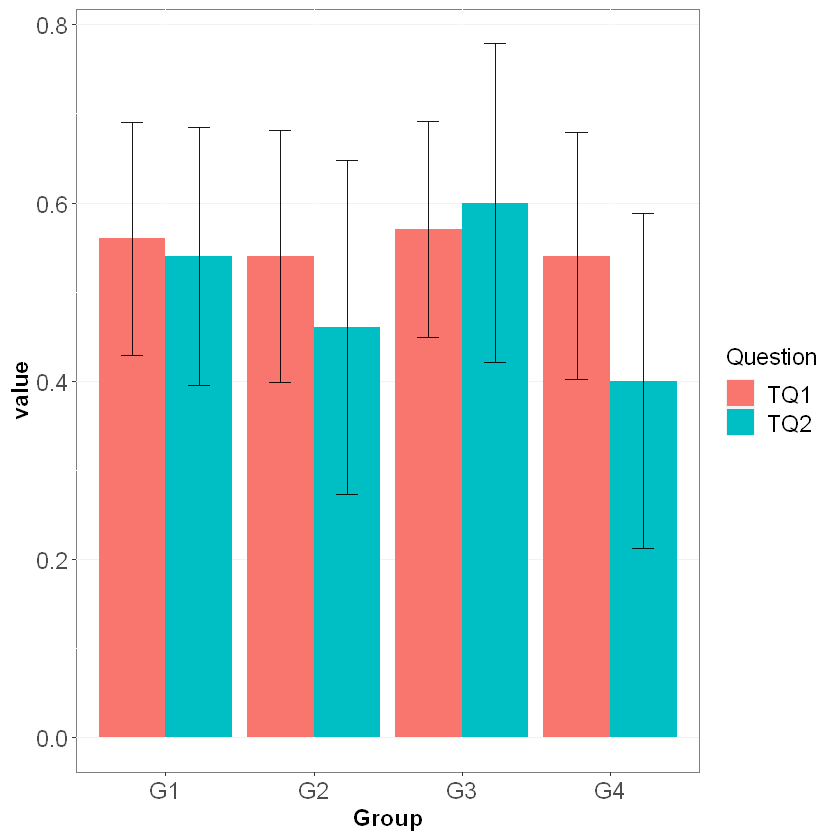

In [17]:
#### Analise por grupo ######

group_data <- desempenho_teorico_aval %>% select (grp,form_teoria_especies_p_manejo,form_teoria_cbXagrotóxicos)
n <- count(group_data, var = grp)
group_data <- group_data %>% group_by(grp) %>% summarise(across(everything(), list(mean,sd)))
group_data$n <- n$n
colnames(group_data) <- c("Group", "TQ1", "Q10_sd", "TQ2", "Q11_sd", "n")
group_data

#melt(as.data.frame(group_data), id.vars = "Group", measure.vars = c("Q10_mean", "Q11_mean"))
#group_data_melt <- melt(as.data.frame(group_data), id=c("Group"))
group_data_melt <- melt(as.data.frame(group_data[,c('Group', 'TQ1', 'TQ2')]), id.vars = c(1))
#group_data_melt

group_data_melt$sd <- group_data$Q10_sd
group_data_melt[5:8,4] <- group_data$Q11_sd
group_data_melt$n <- group_data$n
colnames(group_data_melt)[2] <- "Question"
group_data_melt

#Calculando o intervalo de confianca
alpha=0.05
#t <- qt((1-alpha)/2 + .5, n-1)

ggplot(group_data_melt, aes(fill=Question, y=value, x=Group)) + 
    geom_bar(position="dodge", stat="identity") +
    scale_x_discrete(labels = c("G1", "G2", "G3", "G4")) +
    labs(color = "Question") +
    theme(panel.background = element_rect(fill = "white", colour = "grey50"),
          panel.grid.major.y = element_line(colour = "#f2f2f2"),
          axis.text=element_text(size=14),
          axis.title=element_text(size=14,face="bold"),
          legend.title = element_text(size=14),
          legend.text = element_text(size=14)) +
    geom_errorbar( aes(ymin=value-(qt((1-alpha)/2 + .5, n-1)*sd/sqrt(n)), ymax=value+(qt((1-alpha)/2 + .5, n-1)*sd/sqrt(n))), width=0.3, position=position_dodge(.9), colour="black", alpha=0.9, size=0.5)
  

K,TQ1,Q10_sd,TQ2,Q11_sd,n
1,0.5517241,0.3299033,0.3448276,0.4452818,29
2,0.6363636,0.2589314,0.7272727,0.4100998,11
3,0.5000000,0.3535534,0.5869565,0.3888261,23
4,0.5000000,0.3535534,0.4642857,0.4143710,14


K,Question,value,sd,n
1,TQ1,0.5517241,0.3299033,29
2,TQ1,0.6363636,0.2589314,11
3,TQ1,0.5000000,0.3535534,23
4,TQ1,0.5000000,0.3535534,14
1,TQ2,0.3448276,0.4452818,29
2,TQ2,0.7272727,0.4100998,11
3,TQ2,0.5869565,0.3888261,23
4,TQ2,0.4642857,0.4143710,14


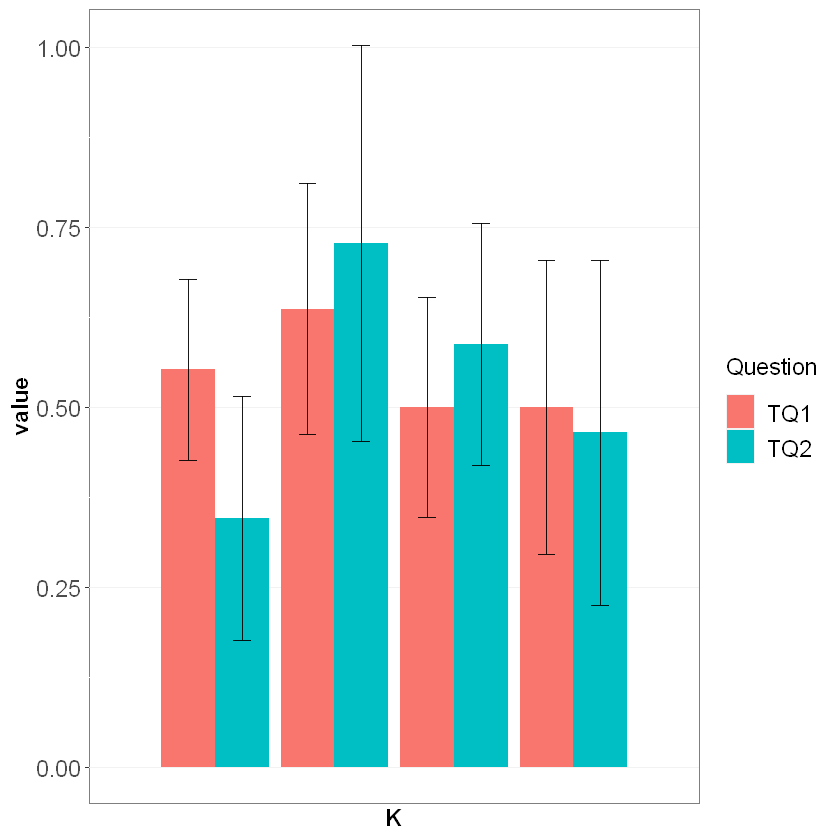

In [18]:
#### Analise por perfil de jogo ######

k_data <- desempenho_teorico_e_jogo_aval %>% select (k,form_teoria_especies_p_manejo,form_teoria_cbXagrotóxicos)
n <- count(k_data, var = k)
k_data <- k_data %>% group_by(k) %>% summarise(across(everything(), list(mean,sd)))
k_data$n <- n$n
colnames(k_data) <- c("K", "TQ1", "Q10_sd", "TQ2", "Q11_sd", "n")
k_data

#melt(as.data.frame(group_data), id.vars = "Group", measure.vars = c("Q10_mean", "Q11_mean"))
#group_data_melt <- melt(as.data.frame(group_data), id=c("Group"))
k_data_melt <- melt(as.data.frame(k_data[,c('K', 'TQ1', 'TQ2')]), id.vars = c(1))
#group_data_melt

k_data_melt$sd <- k_data$Q10_sd
k_data_melt[5:8,4] <- k_data$Q11_sd
k_data_melt$n <- k_data$n
colnames(k_data_melt)[2] <- "Question"
k_data_melt

#Calculando o intervalo de confianca
alpha=0.05
#t <- qt((1-alpha)/2 + .5, n-1)

ggplot(k_data_melt, aes(fill=Question, y=value, x=K)) + 
    geom_bar(position="dodge", stat="identity") +
    scale_x_discrete(labels = c("K1", "K2", "K3", "K4")) +
    labs(color = "Question") +
    theme(panel.background = element_rect(fill = "white", colour = "grey50"),
          panel.grid.major.y = element_line(colour = "#f2f2f2"),
          axis.text=element_text(size=14),
          axis.title=element_text(size=14,face="bold"),
          legend.title = element_text(size=14),
          legend.text = element_text(size=14)) +
    geom_errorbar( aes(ymin=value-(qt((1-alpha)/2 + .5, n-1)*sd/sqrt(n)), ymax=value+(qt((1-alpha)/2 + .5, n-1)*sd/sqrt(n))), width=0.3, position=position_dodge(.9), colour="black", alpha=0.9, size=0.5)
  

In [19]:
group_data

aval_stats_grupos <- desempenho_teorico_e_jogo_aval %>% group_by(grp,k)
n <- count(aval_stats_grupos, var = k)
aval_stats_grupos <- aval_stats_grupos %>% summarise(across(everything(), list(mean,sd)))
aval_stats_grupos$n <- n$n
colnames(aval_stats_grupos) <- c("group", "k", "Q10_mean", "Q10_sd", "Q11_mean", "Q11_sd")
aval_stats_grupos

Group,TQ1,Q10_sd,TQ2,Q11_sd,n
1,0.56,0.3168859,0.54,0.3511885,25
2,0.54,0.3436932,0.46,0.4546061,25
3,0.57,0.2933286,0.60,0.4330127,25
4,0.54,0.3360308,0.40,0.4564355,25


`summarise()` has grouped output by 'grp'. You can override using the `.groups` argument.


group,k,Q10_mean,Q10_sd,Q11_mean,Q11_sd,NA
1,1,0.1666667,0.2886751,0.3333333,0.2886751,3
1,2,0.7500000,NA,1.0000000,NA,1
1,3,0.5833333,0.3535534,0.6666667,0.2500000,9
1,4,0.2500000,0.3535534,0.2500000,0.3535534,2
2,1,0.6750000,0.3129164,0.3000000,0.4830459,10
2,2,0.6875000,0.1250000,0.8750000,0.2500000,4
2,3,0.3928571,0.3779645,0.6428571,0.4755949,7
2,4,0.5000000,0.3535534,0.2500000,0.2886751,4
3,1,0.5000000,0.2738613,0.4166667,0.4915960,6
3,2,0.4166667,0.3818813,1.0000000,0.0000000,3


Group,TQ1,Q10_sd,TQ2,Q11_sd,n
G1,0.5600000,0.3168859,0.5400000,0.3511885,25
G2K3,0.3928571,0.3779645,0.6428571,0.4755949,7
G2K4,0.5000000,0.3535534,0.2500000,0.2886751,4
G3,0.5700000,0.2933286,0.6000000,0.4330127,25
G4K3,0.4583333,0.3679900,0.4166667,0.4915960,6
G4K4,0.4583333,0.3679900,0.5833333,0.4915960,6


Group,variable,value
G1,TQ1,0.5600000
G2K3,TQ1,0.3928571
G2K4,TQ1,0.5000000
G3,TQ1,0.5700000
G4K3,TQ1,0.4583333
G4K4,TQ1,0.4583333
G1,TQ2,0.5400000
G2K3,TQ2,0.6428571
G2K4,TQ2,0.2500000
G3,TQ2,0.6000000


Group,Question,value,sd,n
G1,TQ1,0.5600000,0.3168859,25
G2K3,TQ1,0.3928571,0.3779645,7
G2K4,TQ1,0.5000000,0.3535534,4
G3,TQ1,0.5700000,0.2933286,25
G4K3,TQ1,0.4583333,0.3679900,6
G4K4,TQ1,0.4583333,0.3679900,6
G1,TQ2,0.5400000,0.3511885,25
G2K3,TQ2,0.6428571,0.4755949,7
G2K4,TQ2,0.2500000,0.2886751,4
G3,TQ2,0.6000000,0.4330127,25


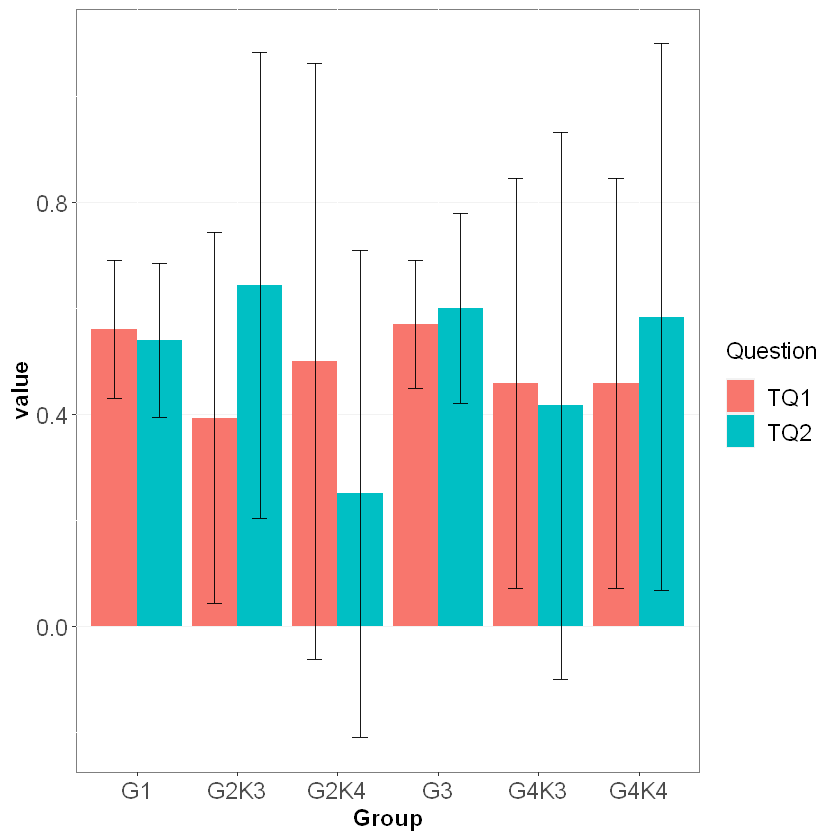

In [20]:
aval_groups <- data.frame(matrix(ncol = 6, nrow = 0))
names(aval_groups) <- c("Group", "TQ1", "Q10_sd", "TQ2", "Q11_sd", "n")

aval_groups[1,1] <- "G1"
aval_groups[1,2:6] <- group_data[1,2:6]
aval_groups[2,1] <- "G2K3"
aval_groups[2,2:6] <- aval_stats_grupos[7,3:7]
aval_groups[3,1] <- "G2K4"
aval_groups[3,2:6] <- aval_stats_grupos[8,3:7]
aval_groups[4,1] <- "G3"
aval_groups[4,2:6] <- group_data[3,2:6]
aval_groups[5,1] <- "G4K3"
aval_groups[5,2:6] <- aval_stats_grupos[15,3:7]
aval_groups[6,1] <- "G4K4"
aval_groups[6,2:6] <- aval_stats_grupos[16,3:7]
#aval_groups[2,3] <- 0
#aval_groups[2,5] <- 0


aval_groups

aval_groups_melt <- melt(as.data.frame(aval_groups[,c('Group', 'TQ1', 'TQ2')]), id.vars = c(1))
aval_groups_melt

aval_groups_melt$sd <- aval_groups$Q10_sd
aval_groups_melt[7:12,4] <- aval_groups$Q11_sd
aval_groups_melt$n <- aval_groups$n
colnames(aval_groups_melt)[2] <- "Question"
aval_groups_melt

ggplot(aval_groups_melt, aes(fill=Question, y=value, x=Group)) + 
    geom_bar(position="dodge", stat="identity") +
    #scale_x_discrete(labels = c("G1", "G2", "G3", "G4")) +
    labs(color = "Question") +
    theme(panel.background = element_rect(fill = "white", colour = "grey50"),
          panel.grid.major.y = element_line(colour = "#f2f2f2"),
          axis.text=element_text(size=14),
          axis.title=element_text(size=14,face="bold"),
          legend.title = element_text(size=14),
          legend.text = element_text(size=14)) +
    geom_errorbar( aes(ymin=value-(qt((1-alpha)/2 + .5, n-1)*sd/sqrt(n)), ymax=value+(qt((1-alpha)/2 + .5, n-1)*sd/sqrt(n))), width=0.3, position=position_dodge(.9), colour="black", alpha=0.9, size=0.5)
    